In [2]:
# %load_ext autoreload
# %autoreload 2
# from nn.value import Value
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline
np.random.seed(1337)
random.seed(1337)

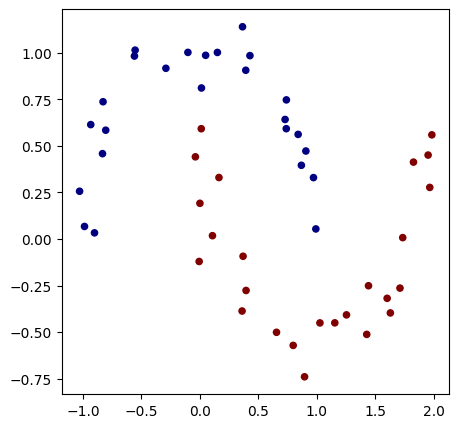

In [3]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X_raw, y_raw = X, y = make_moons(n_samples=50, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [4]:
X.shape

(50, 2)

In [12]:
w1.shape, X.T.shape

(torch.Size([16, 2]), torch.Size([2, 50]))

In [28]:
lr = .1

X = torch.from_numpy(X_raw).float()
y = torch.from_numpy(y_raw)
w1 = torch.randn(2, 16, requires_grad=True)
b1 = torch.randn(16, requires_grad=True)
w2 = torch.randn(16, 2, requires_grad=True)
b2 = torch.randn(2, requires_grad=True)

params = [w1,b1,w2,b2]

for i in range(1):
    # fwd
    x = X@w1+b1
    x = torch.tanh(x)
    x = x@w2+b2
    y_logits = x
    y_logits.retain_grad()
    y_probas = torch.softmax(y_logits, dim=1)
    y_probas.retain_grad()
    nll = -torch.log(y_probas[torch.arange(0,len(y_probas)),y]).mean()
    loss = nll

    # zero grad
    for p in params:
        p.grad = None
    
    #backward
    nll.backward()

    with torch.no_grad():
        for p in params:
            p += -p.grad * lr
        
    # metrics
    y_preds = y_probas.argmax(1)
    acc = (y_preds == y).float().mean()

    if i % 10 == 0:
        print(f'loss {loss.item():.4f} | acc {acc:.4f}')

loss 2.1982 | acc 0.5000


In [ ]:
y_log

In [30]:
y_logits.grad

tensor([[-0.0181,  0.0181],
        [-0.0199,  0.0199],
        [ 0.0008, -0.0008],
        [-0.0194,  0.0194],
        [-0.0199,  0.0199],
        [ 0.0076, -0.0076],
        [-0.0198,  0.0198],
        [ 0.0006, -0.0006],
        [ 0.0007, -0.0007],
        [ 0.0014, -0.0014],
        [-0.0192,  0.0192],
        [ 0.0008, -0.0008],
        [ 0.0077, -0.0077],
        [-0.0199,  0.0199],
        [-0.0196,  0.0196],
        [-0.0199,  0.0199],
        [ 0.0049, -0.0049],
        [ 0.0020, -0.0020],
        [-0.0190,  0.0190],
        [-0.0199,  0.0199],
        [-0.0199,  0.0199],
        [-0.0199,  0.0199],
        [-0.0197,  0.0197],
        [ 0.0017, -0.0017],
        [ 0.0011, -0.0011],
        [-0.0199,  0.0199],
        [ 0.0069, -0.0069],
        [ 0.0072, -0.0072],
        [-0.0189,  0.0189],
        [ 0.0061, -0.0061],
        [-0.0196,  0.0196],
        [ 0.0026, -0.0026],
        [ 0.0005, -0.0005],
        [ 0.0004, -0.0004],
        [-0.0186,  0.0186],
        [-0.0194,  0